Netflix Dataset EDA and Feature Engineering Project

This script performs comprehensive Exploratory Data Analysis (EDA) and Feature Engineering 
on the Netflix titles dataset to prepare it for machine learning models.

Project Flow:
1. Data Loading and Initial Exploration
2. Exploratory Data Analysis (EDA) 
3. Missing Value Treatment
4. Outlier Detection and Removal
5. Feature Encoding
6. Feature Engineering


Dataset: Netflix Titles Dataset (2015)

IMPORT NECESSARY LIBRARIES

In [126]:
import numpy as np          # For numerical operations and array handling
import pandas as pd         # For data manipulation and analysis
import seaborn as sns       # For statistical data visualization
import matplotlib.pyplot as plt  # For creating plots and charts

Load the Netflix dataset

First 5 rows of the dataset:


In [128]:
netflix_data=pd.read_csv(r'C:\ENDURE WORK\EDA AND FEATURE ENGINEERING\USECASE 1\DATA\netflix_titles.csv')
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Last 5 rows of the dataset

In [68]:
netflix_data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


INITIAL DATA EXPLORATION

In [69]:
#Checking for total size ,shape and dimensions
total_size=netflix_data.size
print(f'The total size of the dataset is {total_size}')

total_shape=netflix_data.shape
print(f'The total number of rows in the dataset is {total_shape[0]}')
print(f'The total number of columns in the dataset is {total_shape[1]}')


dimensions=netflix_data.ndim
print(f'The number of  dimensions of the  dataset is {dimensions}')

The total size of the dataset is 105684
The total number of rows in the dataset is 8807
The total number of columns in the dataset is 12
The number of  dimensions of the  dataset is 2


DATA TYPES AND MISSING VALUES OVERVIEW

In [70]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Key Observations from data info:
\
From this we find that few columns have missing values and the datatypes of 11 columns are objects whereas 1 column has integer datatype

UNIQUE VALUES ANALYSIS (Before Data Cleaning)

In [71]:

for col in netflix_data.columns:
    uni=netflix_data[col].nunique()
    print(f'{col} has {uni} unique values')

show_id has 8807 unique values
type has 2 unique values
title has 8807 unique values
director has 4528 unique values
cast has 7692 unique values
country has 748 unique values
date_added has 1767 unique values
release_year has 74 unique values
rating has 17 unique values
duration has 220 unique values
listed_in has 514 unique values
description has 8775 unique values


MISSING VALUES ANALYSIS

In [72]:
#Number of missing values per column
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

We found 6 columns having missing values and below are the names of the columns

In [73]:
null_column_names=netflix_data.columns[netflix_data.isnull().any()]
null_column_names


Index(['director', 'cast', 'country', 'date_added', 'rating', 'duration'], dtype='object')

DUPLICATE VALUES CHECK

In [74]:
total_duplicated_values=netflix_data.duplicated().sum()
total_duplicated_values


np.int64(0)

So, there are no duplicate rows in the dataset.

DATA TYPE CLASSIFICATION

In [75]:
#extracting numeric columns
numeric_col=netflix_data.select_dtypes(include='int').columns
numeric_col

Index(['release_year'], dtype='object')

In [76]:
#extarcting categorical columns
cat_col=netflix_data.select_dtypes(exclude='int').columns
cat_col

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

EXPLORATORY DATA ANALYSIS (EDA) - NUMERICAL COLUMNS

In [77]:
netflix_data[numeric_col].describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


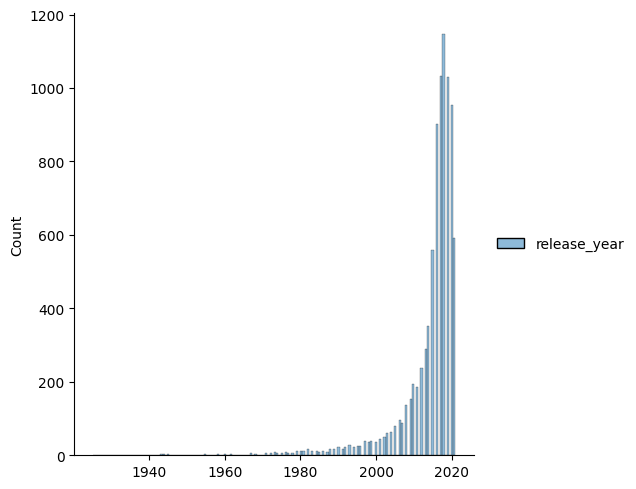

In [78]:

sns.displot(netflix_data[numeric_col])
plt.show()

Key Insight: The distribution is right-skewed, indicating most content is recent

 EXPLORATORY DATA ANALYSIS (EDA) - CATEGORICAL COLUMNS


In [79]:
#Finding unique values per column
for col in cat_col:
    unique_cat_values=netflix_data[col].nunique()
    print(f'{col} has {unique_cat_values} unique values')

show_id has 8807 unique values
type has 2 unique values
title has 8807 unique values
director has 4528 unique values
cast has 7692 unique values
country has 748 unique values
date_added has 1767 unique values
rating has 17 unique values
duration has 220 unique values
listed_in has 514 unique values
description has 8775 unique values


DETAILED ANALYSIS OF KEY CATEGORICAL COLUMNS

ANALYZING 'TYPE' COLUMN (Movie vs TV Show)

In [80]:
netflix_data['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

C:\Users\Jesilda\AppData\Local\Temp\ipykernel_2084\3376997353.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=netflix_data, x='type', palette='Set2')


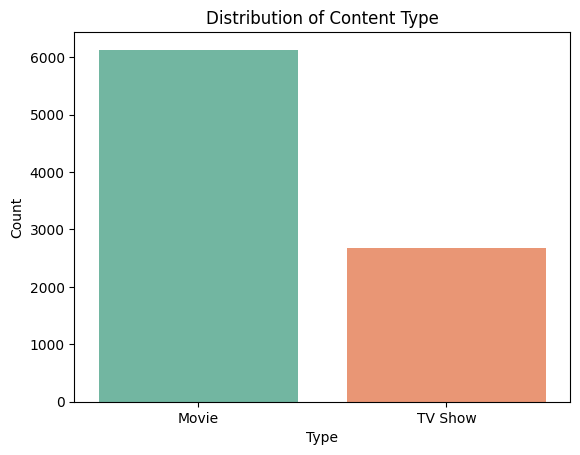

In [81]:
sns.countplot(data=netflix_data, x='type', palette='Set2')
plt.title('Distribution of Content Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


ANALYZING 'DIRECTOR' COLUMN

In [82]:
#Missing value count
netflix_data['director'].isnull().sum()

np.int64(2634)

Top 10 Directors by Number of Titles

In [83]:
top_directors=netflix_data['director'].value_counts().head(10)


C:\Users\Jesilda\AppData\Local\Temp\ipykernel_2084\1948396736.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='Greens_r')


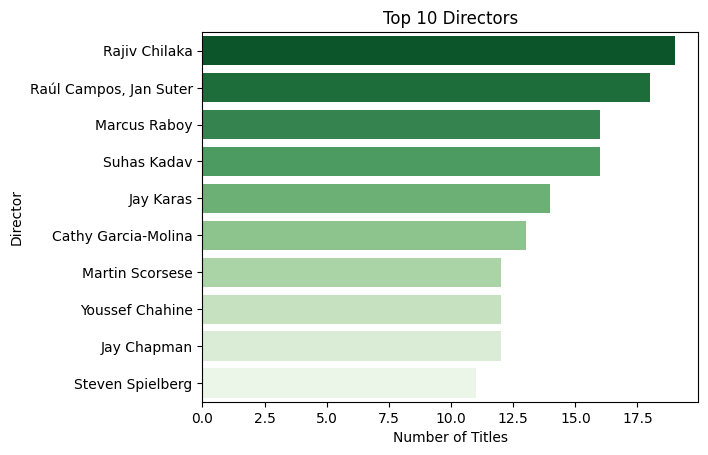

In [84]:
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Greens_r')
plt.title('Top 10 Directors')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

ANALYZING 'CAST' COLUMN

In [85]:
#Missing value count
netflix_data['cast'].isnull().sum()

np.int64(825)

Top 10 Cast Members by Number of Appearances

In [86]:
top_cast=netflix_data['cast'] \
    .dropna() \
    .str.split(',') \
    .explode() \
    .str.strip() \
    .value_counts() \
    .head(10)


C:\Users\Jesilda\AppData\Local\Temp\ipykernel_2084\2517313391.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cast.values, y=top_cast.index, palette='Oranges_r')


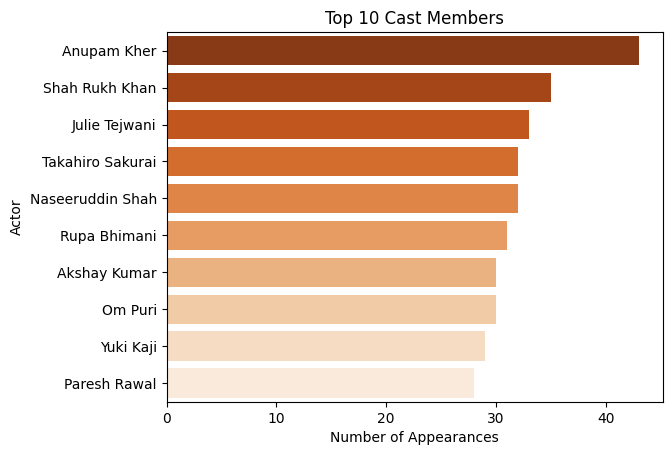

In [87]:
sns.barplot(x=top_cast.values, y=top_cast.index, palette='Oranges_r')
plt.title('Top 10 Cast Members')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor')
plt.show()

ANALYZING 'COUNTRY' COLUMN

In [88]:
#Missing value count
netflix_data['country'].isnull().sum()

np.int64(831)

In [ ]:
netflix_data['country'].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia'], dtype=object)

Top 10 Countries by Content Production

In [90]:
#10 frequently appearing countries
top_countries=netflix_data['country'] \
    .dropna() \
    .str.split(',') \
    .explode() \
    .str.strip() \
    .value_counts() \
    .head(10)

C:\Users\Jesilda\AppData\Local\Temp\ipykernel_2084\3060177083.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='Blues_r')


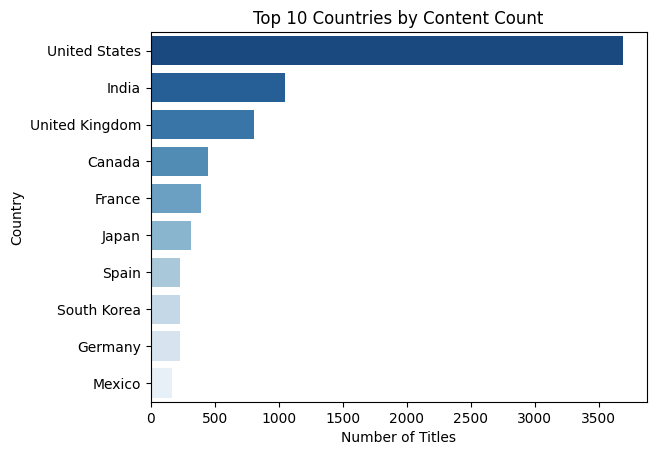

In [182]:
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Blues_r')
plt.title('Top 10 Countries by Content Count')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

In [180]:
countries_with_highest_movies=netflix_data[netflix_data.type=='Movie']

In [181]:
countries_with_highest_TVShows=netflix_data[netflix_data.type=='TV Show']

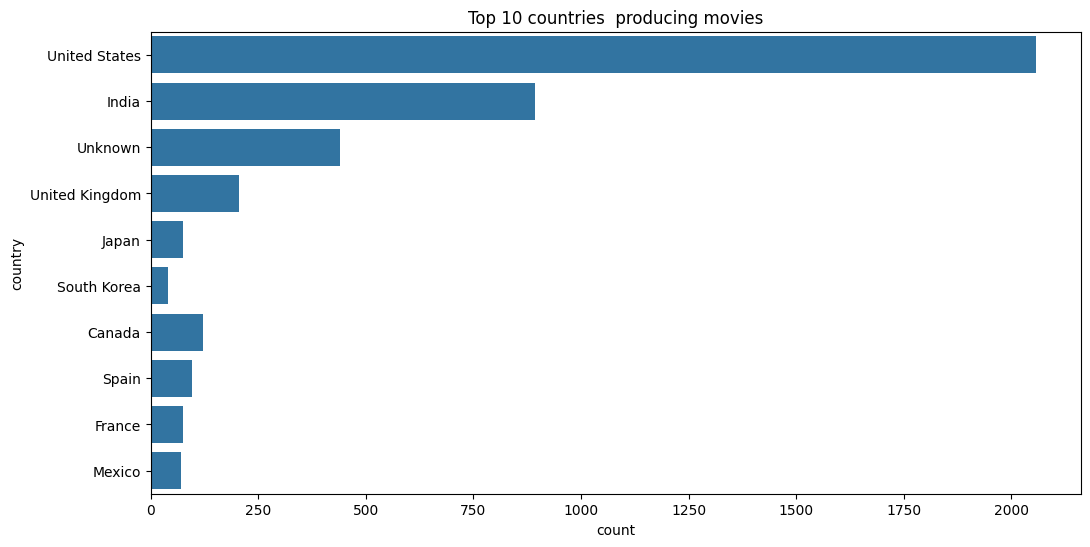

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y='country',order=netflix_data['country'].value_counts().index[0:10],data=countries_with_highest_movies)
plt.title("Top 10 countries producing movies")
plt.show()

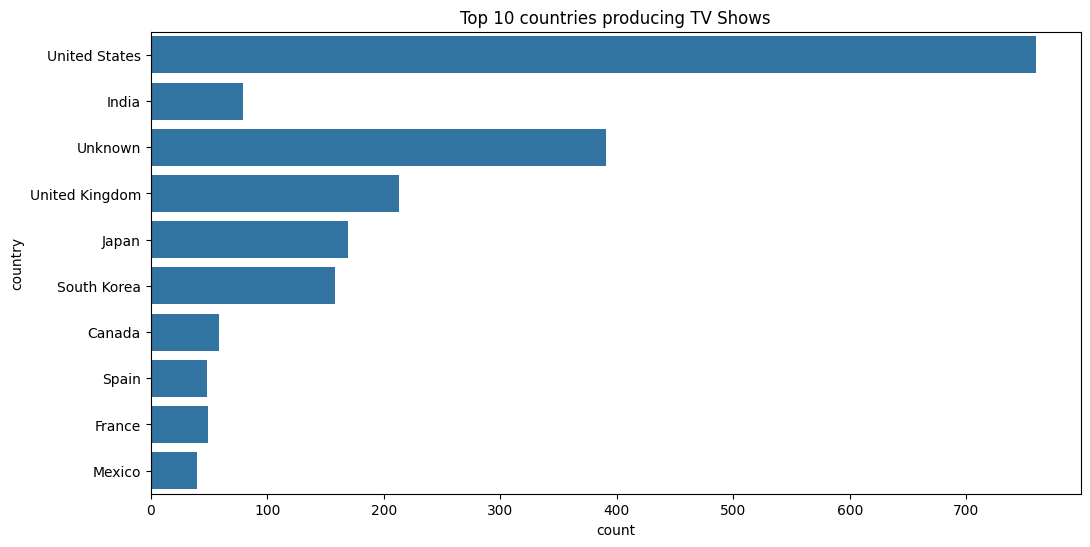

In [185]:
plt.figure(figsize=(12,6))
sns.countplot(y='country',order=netflix_data['country'].value_counts().index[0:10],data=countries_with_highest_TVShows)
plt.title("Top 10 countries producing TV Shows")
plt.show()

ANALYZING 'RATING' COLUMN

In [92]:
#Missing value count
netflix_data['rating'].isnull().sum()

np.int64(4)

In [129]:
rating_order=netflix_data['rating'].value_counts()
rating_order

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [130]:
rating_order_index=rating_order=netflix_data['rating'].value_counts().index


C:\Users\Jesilda\AppData\Local\Temp\ipykernel_2084\2118611453.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=netflix_data, y='rating', order=rating_order_index, palette='Set3')


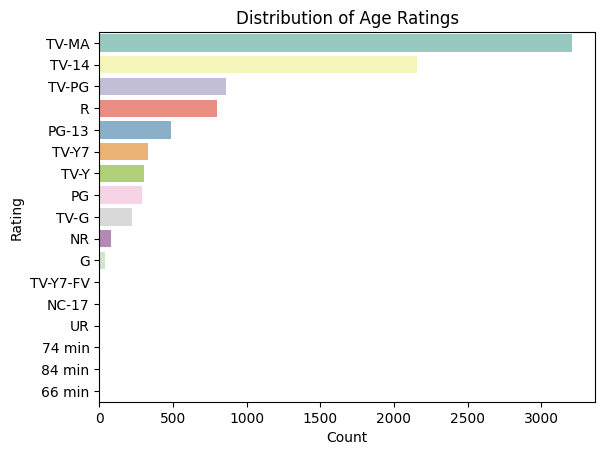

In [131]:
sns.countplot(data=netflix_data, y='rating', order=rating_order_index, palette='Set3')
plt.title('Distribution of Age Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


ANALYZING 'LISTED_IN' COLUMN

In [95]:
#Missing value count
netflix_data['listed_in'].isnull().sum()

np.int64(0)

In [96]:
netflix_data['listed_in'].value_counts()

listed_in
Dramas, International Movies                                  362
Documentaries                                                 359
Stand-Up Comedy                                               334
Comedies, Dramas, International Movies                        274
Dramas, Independent Movies, International Movies              252
                                                             ... 
Classic & Cult TV, TV Horror, TV Mysteries                      1
British TV Shows, TV Dramas, TV Sci-Fi & Fantasy                1
Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy      1
Comedies, Cult Movies, Sports Movies                            1
Cult Movies, Dramas, Thrillers                                  1
Name: count, Length: 514, dtype: int64

Top 10 Genres

In [97]:
top_genres = netflix_data['listed_in'] \
    .dropna() \
    .str.split(',') \
    .explode() \
    .str.strip() \
    .value_counts()[:10]


C:\Users\Jesilda\AppData\Local\Temp\ipykernel_2084\2107610092.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='Purples_r')


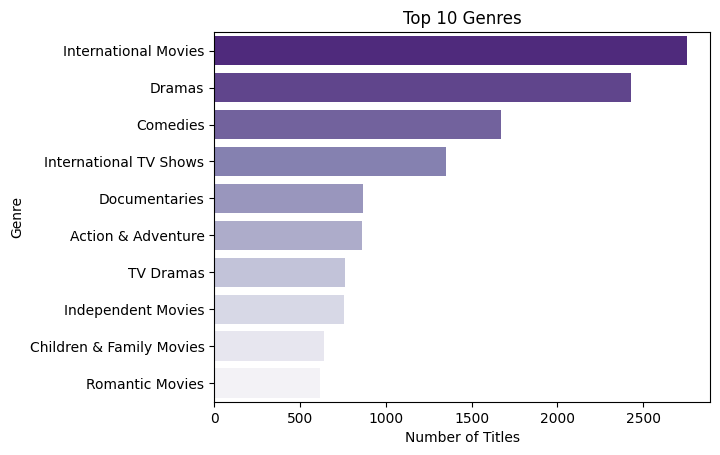

In [98]:

sns.barplot(x=top_genres.values, y=top_genres.index, palette='Purples_r')
plt.title('Top 10 Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

MISSING VALUE TREATMENT

Treating numerical columns

In [99]:
netflix_data['release_year'].fillna(netflix_data['release_year'].median(),inplace=True)


C:\Users\Jesilda\AppData\Local\Temp\ipykernel_2084\4129762391.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_data['release_year'].fillna(netflix_data['release_year'].median(),inplace=True)


In [100]:

netflix_data['release_year'].isnull().sum()



np.int64(0)

All missing values fixed!

Treating categorical columns

In [169]:
netflix_data['director'].fillna('Unknown', inplace=True)

C:\Users\Jesilda\AppData\Local\Temp\ipykernel_2084\1587463589.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_data['director'].fillna('Unknown', inplace=True)


In [170]:
netflix_data['cast'].fillna('Unknown', inplace=True)


C:\Users\Jesilda\AppData\Local\Temp\ipykernel_2084\1386869763.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_data['cast'].fillna('Unknown', inplace=True)


In [171]:
netflix_data['country'] = netflix_data['country'].fillna('Unknown')

In [175]:
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], format='mixed', errors='coerce')
most_common_date = netflix_data['date_added'].median()
netflix_data['date_added'].fillna(most_common_date, inplace=True)


C:\Users\Jesilda\AppData\Local\Temp\ipykernel_2084\3030671939.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_data['date_added'].fillna(most_common_date, inplace=True)


In [172]:
netflix_data['rating'].fillna(netflix_data['rating'].mode()[0], inplace=True)


C:\Users\Jesilda\AppData\Local\Temp\ipykernel_2084\1349234761.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_data['rating'].fillna(netflix_data['rating'].mode()[0], inplace=True)


In [106]:
netflix_data['listed_in'].fillna('Unknown', inplace=True)


C:\Users\Jesilda\AppData\Local\Temp\ipykernel_2084\202108073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_data['listed_in'].fillna('Unknown', inplace=True)


In [177]:
netflix_data[netflix_data['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [178]:
netflix_data.loc[netflix_data['director']=='Louis C.K.','duration']=netflix_data['rating']

In [179]:
netflix_data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

OUTLIER DETECTION AND TREATMENT

Analyzing outliers in 'release_year' column

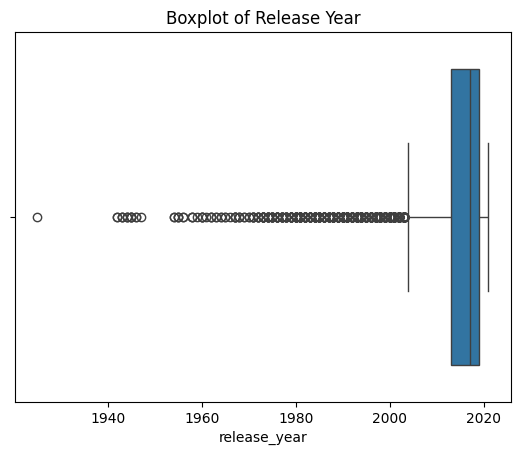

In [107]:
sns.boxplot(x=netflix_data['release_year'])
plt.title('Boxplot of Release Year')
plt.show()


In [108]:
Q1 = netflix_data['release_year'].quantile(0.25)
Q3 = netflix_data['release_year'].quantile(0.75)
IQR = Q3 - Q1

# Filtered dataset
netflix_data_cleaned = netflix_data[
    (netflix_data['release_year'] >= Q1 - 1.5 * IQR) &
    (netflix_data['release_year'] <= Q3 + 1.5 * IQR)
]


Analyzing outliers in 'release_year' column after outlier removal

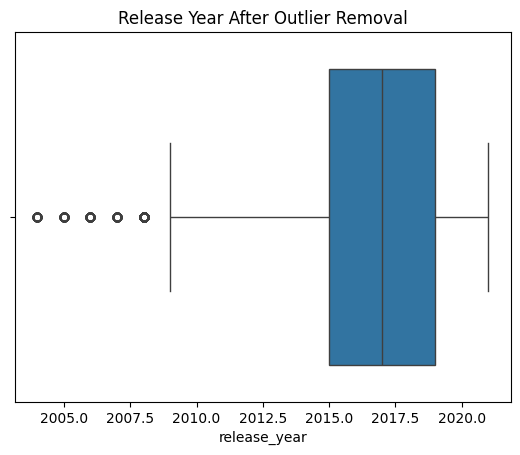

In [134]:
sns.boxplot(x=netflix_data_cleaned['release_year'])
plt.title('Release Year After Outlier Removal')
plt.show()


FEATURE ENCODING

ONE-HOT ENCODING for 'type' column

In [138]:
from sklearn.preprocessing import OneHotEncoder

type_ohe = OneHotEncoder(sparse_output=False, drop=None)
type_encoded = type_ohe.fit_transform(netflix_data_cleaned[['type']])

type_encoded_df = pd.DataFrame(type_encoded, columns=type_ohe.get_feature_names_out(['type']))

netflix_data_cleaned = pd.concat([netflix_data_cleaned, type_encoded_df], axis=1)


In [139]:
netflix_data_cleaned

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type_Movie,type_TV Show
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1.0,0.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0.0,1.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0.0,1.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0.0,1.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8055,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,1.0,0.0
8063,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,1.0,0.0
8074,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,1.0,0.0
8075,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,1.0,0.0


LABEL ENCODING for 'rating' column

In [140]:
from sklearn.preprocessing import LabelEncoder

le_rating = LabelEncoder()
netflix_data_cleaned['rating_encoded'] = le_rating.fit_transform(netflix_data_cleaned['rating'])


In [142]:
netflix_data_cleaned

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type_Movie,type_TV Show,rating_encoded
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1.0,0.0,7
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0.0,1.0,11
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0.0,1.0,11
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0.0,1.0,11
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0.0,1.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8055,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,1.0,0.0,17
8063,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,1.0,0.0,17
8074,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,1.0,0.0,17
8075,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,1.0,0.0,17


FEATURE ENGINEERING

Creating new features to enhance model performance

In [143]:
netflix_data_cleaned

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type_Movie,type_TV Show,rating_encoded
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1.0,0.0,7
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0.0,1.0,11
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0.0,1.0,11
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0.0,1.0,11
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0.0,1.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8055,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,1.0,0.0,17
8063,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,1.0,0.0,17
8074,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,1.0,0.0,17
8075,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,1.0,0.0,17


 TEMPORAL FEATURES from 'date_added'

Extract Year, Month, Day from date_added

In [144]:
# Ensure date_added is in datetime format
netflix_data_cleaned['date_added'] = pd.to_datetime(netflix_data_cleaned['date_added'])

# Extract year, month, and day name
netflix_data_cleaned['year_added'] = netflix_data_cleaned['date_added'].dt.year
netflix_data_cleaned['month_added'] = netflix_data_cleaned['date_added'].dt.month
netflix_data_cleaned['day_added'] = netflix_data_cleaned['date_added'].dt.day_name()


AGE-RELATED FEATURES:

 years_since_release Column

In [145]:
current_year = 2025  
netflix_data_cleaned['years_since_release'] = current_year - netflix_data_cleaned['release_year']


is_recent_release Flag (Release Year > 2019)

In [146]:
netflix_data_cleaned['is_recent_release'] = netflix_data_cleaned['release_year'] > 2019


TEXT-BASED FEATURES

In [149]:
netflix_data_cleaned['title_word_count'] = netflix_data_cleaned['title'].fillna('').str.split().apply(len)
netflix_data_cleaned['description_len'] = netflix_data_cleaned['description'].fillna('').str.len()


In [151]:
netflix_data_cleaned

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,type_Movie,type_TV Show,rating_encoded,year_added,month_added,day_added,years_since_release,is_recent_release,title_word_count,description_len
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020.0,PG-13,90 min,...,1.0,0.0,7,2021.0,9.0,Saturday,5.0,True,4,152
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021.0,TV-MA,2 Seasons,...,0.0,1.0,11,2021.0,9.0,Friday,4.0,True,3,147
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021.0,TV-MA,1 Season,...,0.0,1.0,11,2021.0,9.0,Friday,4.0,True,1,146
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021.0,TV-MA,1 Season,...,0.0,1.0,11,2021.0,9.0,Friday,4.0,True,3,147
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021.0,TV-MA,2 Seasons,...,0.0,1.0,11,2021.0,9.0,Friday,4.0,True,2,152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8055,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,1.0,0.0,17,NaN,NaN,NaN,NaN,False,0,0
8063,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,1.0,0.0,17,NaN,NaN,NaN,NaN,False,0,0
8074,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,1.0,0.0,17,NaN,NaN,NaN,NaN,False,0,0
8075,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,1.0,0.0,17,NaN,NaN,NaN,NaN,False,0,0


CATEGORICAL COMPLEXITY FEATURES

 Multi-country production indicator


In [152]:
netflix_data_cleaned['is_multi_country'] = netflix_data_cleaned['country'].fillna('').str.contains(',')

Number of genres


In [153]:
netflix_data_cleaned['num_genres'] = netflix_data_cleaned['listed_in'].fillna('').apply(
    lambda x: len(x.split(',')) if x else 0
)

DAYS-TO-NETFLIX FEATURE

In [154]:
netflix_data_cleaned['days_to_netflix'] = (netflix_data_cleaned['date_added'].dt.year - netflix_data_cleaned['release_year']) * 365


FINAL DATASET SUMMARY

In [155]:
netflix_data_cleaned

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,year_added,month_added,day_added,years_since_release,is_recent_release,title_word_count,description_len,is_multi_country,num_genres,days_to_netflix
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020.0,PG-13,90 min,...,2021.0,9.0,Saturday,5.0,True,4,152,False,1,365.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021.0,TV-MA,2 Seasons,...,2021.0,9.0,Friday,4.0,True,3,147,False,3,0.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021.0,TV-MA,1 Season,...,2021.0,9.0,Friday,4.0,True,1,146,False,3,0.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021.0,TV-MA,1 Season,...,2021.0,9.0,Friday,4.0,True,3,147,False,2,0.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021.0,TV-MA,2 Seasons,...,2021.0,9.0,Friday,4.0,True,2,152,False,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8055,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,0,0,False,0,NaN
8063,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,0,0,False,0,NaN
8074,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,0,0,False,0,NaN
8075,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,0,0,False,0,NaN


In [164]:
netflix_data_cleaned.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'type_Movie', 'type_TV Show', 'rating_encoded', 'year_added',
       'month_added', 'day_added', 'years_since_release', 'is_recent_release',
       'title_word_count', 'description_len', 'is_multi_country', 'num_genres',
       'days_to_netflix'],
      dtype='object')

In [165]:
print(f"Final dataset dimensions: {netflix_data_cleaned.shape}")
print(f"otal features created: {netflix_data_cleaned.shape[1] - netflix_data.shape[1]} new features")


Final dataset dimensions: (8703, 25)
otal features created: 13 new features


THIS IS THE FINAL CLEANED DATASET